In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('/Users/xiaotingzhong/Documents/Matlab/Grain Tracking/190318_mig_signs.txt', header=0)

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

eps = 1e-2
mask_pos = (y > eps)
mask_neg = (y < -eps)
sign = pd.Series(np.zeros(X.shape[0]), name = 'motion_sign')
sign[mask_pos] = 'pos'
sign[mask_neg] = 'neg'
sign[sign==0] = 'stable'


### Random Forest

In [23]:
print np.sum(y == 0)
print np.sum(y == 1)
print np.sum(y == -1)

1047
3113
2844


0.6620502569960023
[0.4171007  0.28851861 0.17426504 0.03131072 0.00116224 0.01114154
 0.07650116]


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

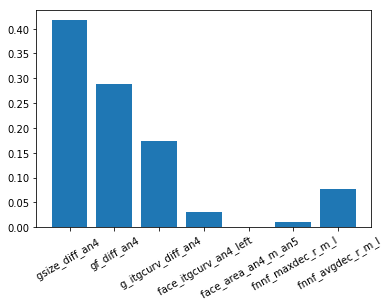

In [19]:
# X.iloc[:,-1] = - X.iloc[:,-1]

# clf = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
# clf.fit(X, sign)
print clf.score(X, sign)
print clf.feature_importances_

p1 = plt.bar(np.arange(X.shape[1]), clf.feature_importances_)

plt.xticks(np.arange(X.shape[1]), X.columns.values)
plt.xticks(rotation=30)

### Logistic Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.api as st

dummy_sign = pd.get_dummies(sign)

X_sm = st.add_constant(X.iloc[:,[0]])
logit = st.MNLogit(dummy_sign.values, X_sm.values)

result = logit.fit()





In [ ]:
# import statsmodels.api as st
# iris = st.datasets.get_rdataset('iris', 'datasets')
# y = iris.data.Species
# x = iris.data.ix[:, 0]
# x = st.add_constant(x, prepend = False)

# mdl = st.MNLogit(y, x)
# mdl_fit = mdl.fit()
# print mdl_fit.summary2()

X.iloc[:,[0,-1]]
